# Machine Learning Methodologies: Classification

## Data Acquisition

In [1]:
import pandas as pd
import numpy as np

from pydataset import data
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from env import host, username, password
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import pearsonr

## Problem 1

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.  

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
df_iris = data('iris')

### Print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### Print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

### Print the column names

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### Print the data type of each column

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [8]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]

,mean,50%,std,range
Sepal.Length,5.843333,5.80,0.828066,3.6
Sepal.Width,3.057333,3.00,0.435866,2.4
Petal.Length,3.758000,4.35,1.765298,5.9
Petal.Width,1.199333,1.30,0.762238,2.4


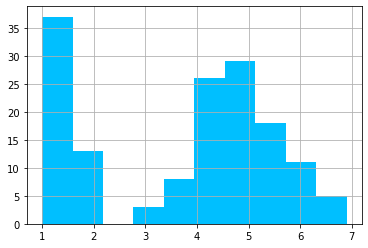

In [10]:
df_iris['Petal.Length'].hist(color='deepskyblue')

plt.show()

## Problem 2

Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables

In [11]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [12]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


### Assign the first 100 rows to a new dataframe, df_excel_sample

In [13]:
df_excel_sample = df_excel.head(100)

In [14]:
df_excel_sample.shape

(100, 12)

### Print the number of rows of your original dataframe

In [15]:
df_excel.shape[0]

7049

### Print the first 5 column names

In [16]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### Print the column names that have a data type of object

In [17]:
df_excel.select_dtypes(include='object').head()

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


### Compute the range for each of the numeric variables

In [18]:
telco_stats = df_excel.describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [19]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00,1.0
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


## Problem 3

Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [20]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [21]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [22]:
df_google = pd.read_csv(csv_export_url)

### Print the first 3 rows

In [23]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Print the number of rows and columns

In [24]:
df_google.shape

(891, 12)

### Print the column names

In [25]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### Print the data type of each column

In [26]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df_google = df_google.astype({'PassengerId': 'object', 'Survived': 'object', 'Pclass': 'object'})
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


### Print the summary statistics for each of the numeric variables

In [29]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Print the unique values for each of your categorical variables

In [30]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

PassengerId has 891 unique values.
Survived has 2 unique values.
Pclass has 3 unique values.
Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [31]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [32]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [34]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

# Acquire.py

### Problem 1

Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [35]:
def get_connection(db, username=username, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [36]:
def new_titanic_data():
    sql_query = 'SELECT * FROM passengers'
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    df.to_csv('titanic_df.csv')
    return df

In [37]:
def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database if cached == False
    or if cached == True reads in titanic df from a csv file, returns df
    '''
    if cached or os.path.isfile('titanic_df.csv') == False:
        df = new_titanic_data()
    else:
        df = pd.read_csv('titanic_df.csv', index_col=0)
    return df

In [38]:
titanic_df = get_titanic_data(cached=False)

In [39]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Problem 2

Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [40]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df,
    writes it to a csv file, and returns the df.
    '''
    sql_query = """
                SELECT species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id)
                """
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    df.to_csv('iris_df.csv')
    return df

In [41]:
def get_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database if cached == False
    or if cached == True reads in iris df from a csv file, returns df
    '''
    if cached or os.path.isfile('iris_df.csv') == False:
        df = new_iris_data()
    else:
        df = pd.read_csv('iris_df.csv', index_col=0)
    return df

In [42]:
iris_df = get_iris_data(cached=False)

In [43]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### Problem 3

Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

- Done in problems above 

## Data Preparation

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

### Problem 1

Use the function defined in acquire.py to load the iris data.

In [44]:
iris = get_iris_data()
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### Problem 2

Drop the species_id columns.

In [45]:
iris = iris.drop(columns='species_id')
iris.head(2)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2


### Problem 3

Rename the species_name column to just species.

In [46]:
iris = iris.rename(columns={'species_name': 'species'})
iris.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2


### Problem 4

Create dummy variables of the species name.

In [47]:
species_dummies = pd.get_dummies(iris.species, drop_first=True)
species_dummies.head(3)

,versicolor,virginica
0,0,0
1,0,0
2,0,0


In [48]:
iris = pd.concat([iris, species_dummies], axis=1)
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


### Problem 5

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [49]:
def prep_iris(cached=True):
    
    # use my aquire function to read data into a df from a csv file
    df = get_iris_data(cached)
    
    # drop and rename columns
    df = df.drop(columns='species_id').rename(columns={'species_name': 'species'})
    
    # create dummy columns for species
    species_dummies = pd.get_dummies(df.species, drop_first=True)
    
    # add dummy columns to df
    df = pd.concat([df, species_dummies], axis=1)
    
    return df

In [50]:
iris = prep_iris()
iris.sample(7)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
13,setosa,4.3,3.0,1.1,0.1,0,0
85,versicolor,6.0,3.4,4.5,1.6,1,0
9,setosa,4.9,3.1,1.5,0.1,0,0
126,virginica,6.2,2.8,4.8,1.8,0,1
115,virginica,6.4,3.2,5.3,2.3,0,1
65,versicolor,6.7,3.1,4.4,1.4,1,0
148,virginica,6.2,3.4,5.4,2.3,0,1


## Exploratory Analysis

In [51]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### Problem 1

Split your data into train, test, and validate samples.

In [52]:
train_validate, test = train_test_split(iris_df, test_size=.2, 
                                        random_state=123,
                                        stratify=iris_df.species_name
                                       )

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,
                                   stratify=train_validate.species_name
                                  )

In [53]:
train.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
79,2,versicolor,5.7,2.6,3.5,1.0
36,1,setosa,5.5,3.5,1.3,0.2
133,3,virginica,6.3,2.8,5.1,1.5
95,2,versicolor,5.7,3.0,4.2,1.2
18,1,setosa,5.7,3.8,1.7,0.3


### Problem 2

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [54]:
train_melt = train.melt(id_vars='species_name',
           var_name='measurement')
train_melt.head()

,species_name,measurement,value
0,versicolor,species_id,2.0
1,setosa,species_id,1.0
2,virginica,species_id,3.0
3,versicolor,species_id,2.0
4,setosa,species_id,1.0


In [55]:
train_melt = train_melt[((train_melt.measurement == 'sepal_length') | (train_melt.measurement == 'sepal_width') | (train_melt.measurement == 'petal_length') | (train_melt.measurement == 'petal_width'))]
train_melt.head()

,species_name,measurement,value
84,versicolor,sepal_length,5.7
85,setosa,sepal_length,5.5
86,virginica,sepal_length,6.3
87,versicolor,sepal_length,5.7
88,setosa,sepal_length,5.7


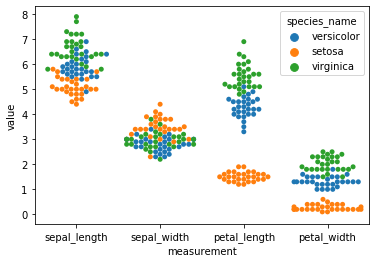

In [56]:
sns.swarmplot(x=train_melt.measurement, y=train_melt.value, hue = 'species_name', data=train_melt)

### Problem 3

Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length  

What are your takeaways?

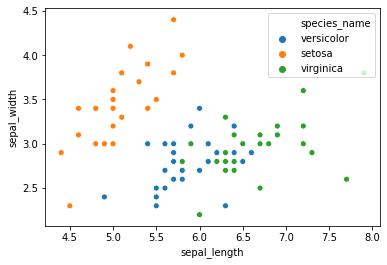

In [57]:
sns.scatterplot(x=train.sepal_length,y=train.sepal_width,hue=train.species_name)

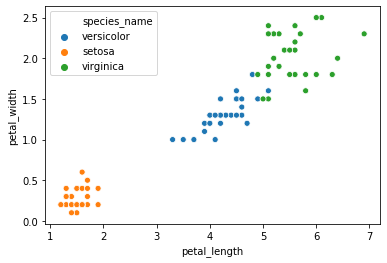

In [58]:
sns.scatterplot(x=train.petal_length,y=train.petal_width,hue=train.species_name)

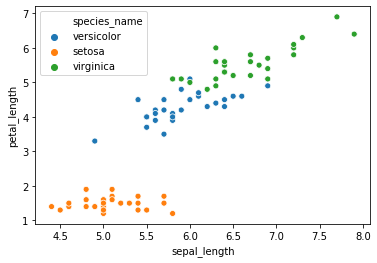

In [59]:
sns.scatterplot(x=train.sepal_length,y=train.petal_length,hue=train.species_name)

### Problem 4

Create a heatmap of each variable layering correlation coefficient on top.

In [60]:
corr = train.corr()
round(corr,2)

,species_id,sepal_length,sepal_width,petal_length,petal_width
species_id,1.00,0.82,-0.46,0.95,0.95
sepal_length,0.82,1.00,-0.15,0.87,0.82
sepal_width,-0.46,-0.15,1.00,-0.48,-0.40
petal_length,0.95,0.87,-0.48,1.00,0.96
petal_width,0.95,0.82,-0.40,0.96,1.00


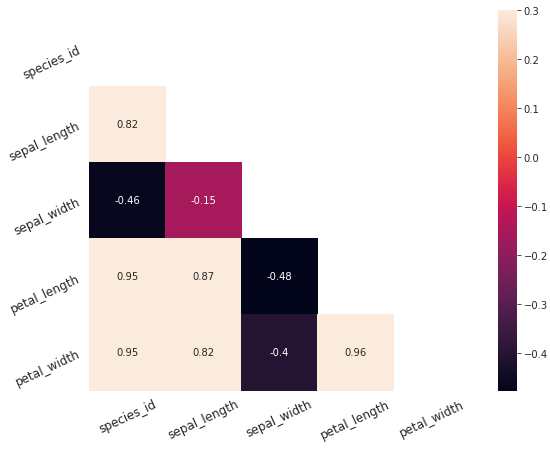

In [61]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 25, fontsize = 12)

### Problem 5

Create a scatter matrix visualizing the interaction of each variable

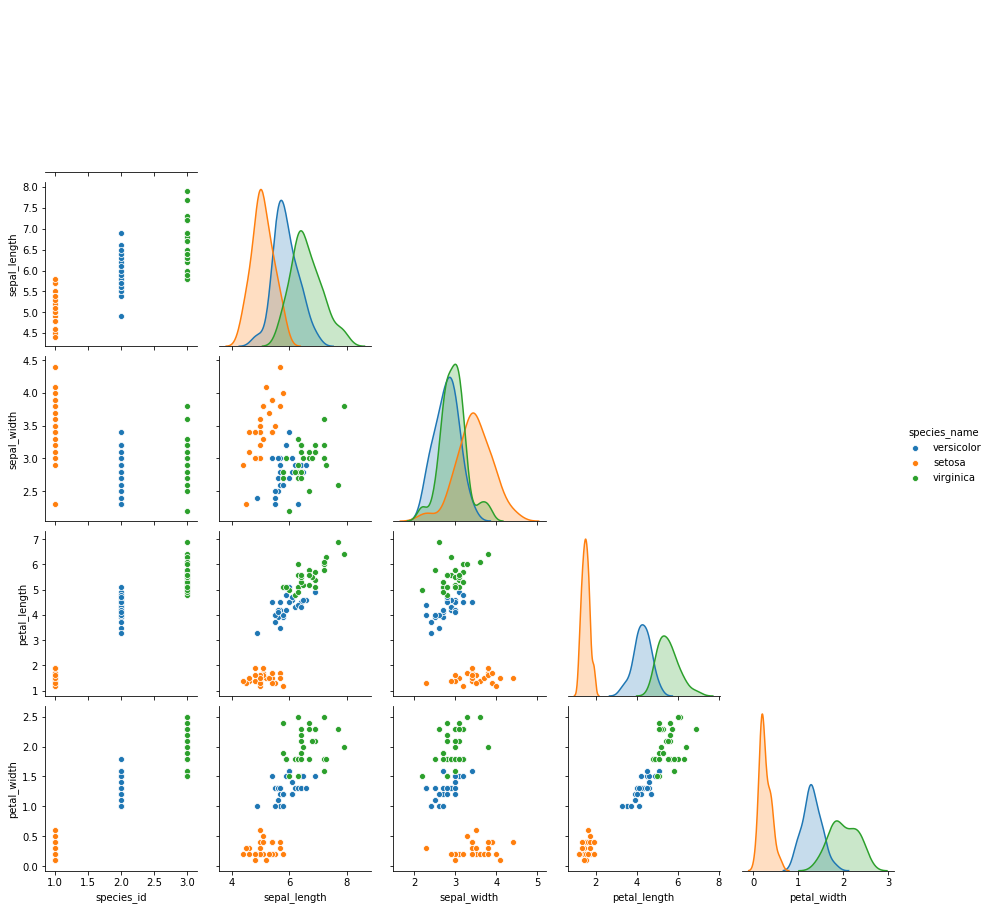

In [62]:
sns.pairplot(train, hue="species_name",corner=True)

### Problem 6

Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

What is your takeaway from this statistical testing?

In [63]:
virginica = train[train.species_name == 'virginica'].sepal_length
versicolor = train[train.species_name == 'versicolor'].sepal_length

In [64]:
r, p = pearsonr(virginica, versicolor)
r, p

(0.12955644787553267, 0.5111354634944449)

### Problem 7

Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [65]:
vers = train[train.species_name == 'versicolor'].petal_length
virg = train[train.species_name == 'virginica'].petal_length
seto = train[train.species_name == 'setosa'].petal_length

vers_mean = train[train.species_name == 'versicolor'].petal_length.mean()
virg_mean = train[train.species_name == 'virginica'].petal_length.mean()
seto_mean = train[train.species_name == 'setosa'].petal_length.mean()


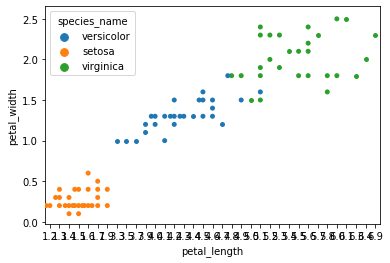

In [66]:
sns.swarmplot(x=train.petal_length,y=train.petal_width,hue=train.species_name)

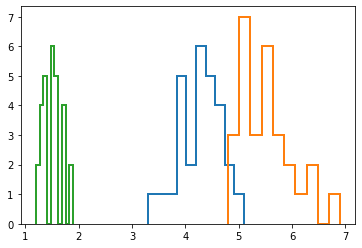

In [67]:
plt.hist(vers,histtype='step',linewidth=2)
plt.hist(virg,histtype='step',linewidth=2)
plt.hist(seto,histtype='step',linewidth=2)
plt.show()